### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
print("Tienda 1")
sumatoria_tienda = sum(tienda.Precio)
print(sumatoria_tienda)

print("Tienda 2")
sumatoria_tienda2 = sum(tienda2.Precio)
print(sumatoria_tienda2)

print("Tienda 3")
sumatoria_tienda3 = sum(tienda3.Precio)
print(sumatoria_tienda3)

print("Tienda 4")
sumatoria_tienda4 = sum(tienda4.Precio)
print(sumatoria_tienda4)

Tienda 1
1150880400.0
Tienda 2
1116343500.0
Tienda 3
1098019600.0
Tienda 4
1038375700.0


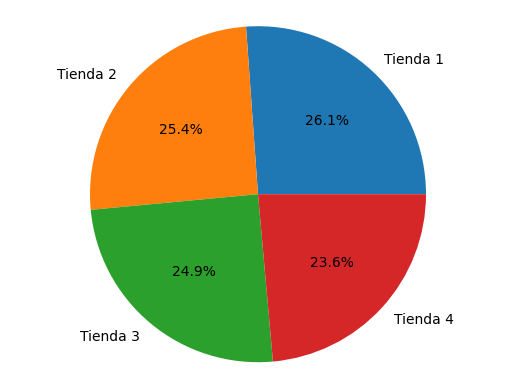

In [ ]:
tiendas = ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"]
sumatorias = [sumatoria_tienda,sumatoria_tienda2,sumatoria_tienda3,sumatoria_tienda4]

plt.pie(sumatorias,labels=tiendas, autopct="%0.1f%%")
plt.axis("equal")
plt.show()

# 2. Ventas por categoría

In [ ]:
print("Tienda 1")
categoria_mas_vendida = tienda["Categoría del Producto"].value_counts().head(3)
print(categoria_mas_vendida)

print("Tienda 2")
categoria_mas_vendida2 = tienda2["Categoría del Producto"].value_counts().head(3)
print(categoria_mas_vendida2)

print("Tienda 2")
categoria_mas_vendida3 = tienda3["Categoría del Producto"].value_counts().head(3)
print(categoria_mas_vendida3)

print("Tienda 4")
categoria_mas_vendida4 = tienda4["Categoría del Producto"].value_counts().head(3)
print(categoria_mas_vendida4)

Tienda 1
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64
Tienda 2
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64
Tienda 2
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64
Tienda 4
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


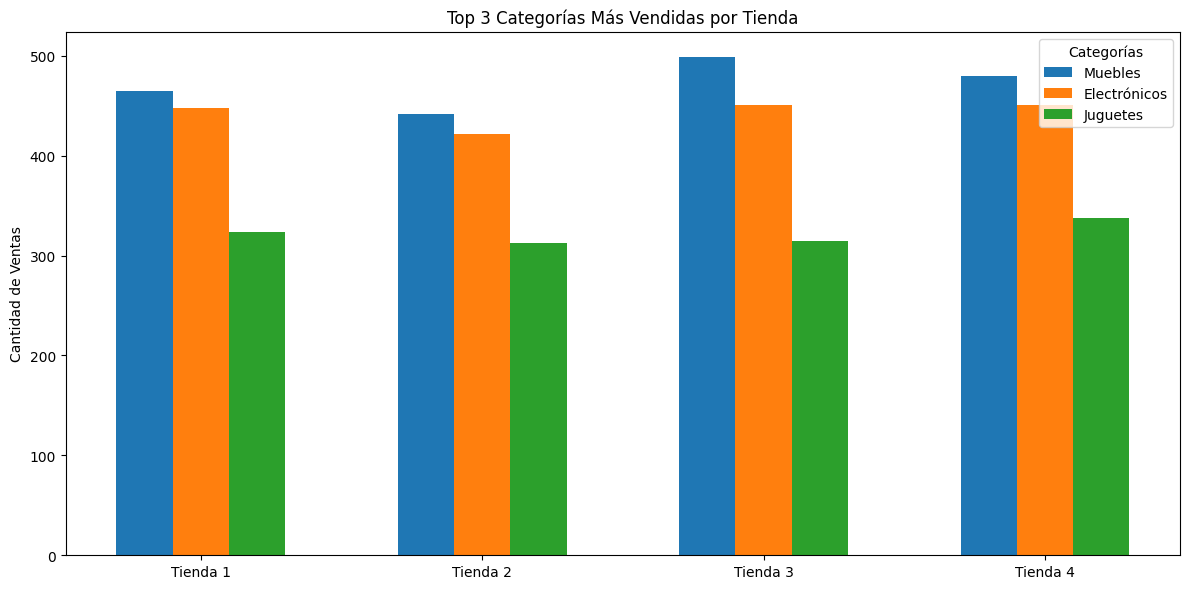

In [ ]:
tiendas = ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"]
categorias_mas_vendidas = [categoria_mas_vendida,categoria_mas_vendida2,categoria_mas_vendida3,categoria_mas_vendida4]

categorias_t1 = categoria_mas_vendida
categorias_t2 = categoria_mas_vendida2
categorias_t3 = categoria_mas_vendida3
categorias_t4 = categoria_mas_vendida4

# Agrupamos en una lista para recorrerlas
categorias_por_tienda = [categorias_t1, categorias_t2, categorias_t3, categorias_t4]

# Obtener todas las categorías (pueden repetirse entre tiendas)
todas_las_categorias = list(set(categorias_t1.index.tolist() +
                                 categorias_t2.index.tolist() +
                                 categorias_t3.index.tolist() +
                                 categorias_t4.index.tolist()))

# Orden para graficar
x = np.arange(len(tiendas))  # posiciones de las tiendas
width = 0.2  # ancho de cada barra

# Crear gráfico
plt.figure(figsize=(12, 6))

# Para cada categoría (máximo 3), graficamos sus valores en cada tienda
for i in range(3):  # solo las 3 primeras
    valores = []
    etiquetas = []
    for tienda_categorias in categorias_por_tienda:
        # Asegura que haya al menos i categorías
        if i < len(tienda_categorias):
            valores.append(tienda_categorias.values[i])
            etiquetas.append(tienda_categorias.index[i])
        else:
            valores.append(0)
            etiquetas.append("")

    plt.bar(x + i * width, valores, width=width, label=f"{etiquetas[0] if etiquetas[0] else f'Categoría {i+1}'}")

# Ajustes del gráfico
plt.xticks(x + width, tiendas)
plt.ylabel("Cantidad de Ventas")
plt.title("Top 3 Categorías Más Vendidas por Tienda")
plt.legend(title="Categorías")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
print("Tienda 1")
promedio_producto_tienda1 = np.average((tienda.Calificación))
print(promedio_producto_tienda1)

print("Tienda 2")
promedio_producto_tienda2 = np.average((tienda2.Calificación))
print(promedio_producto_tienda2)

print("Tienda 3")
promedio_producto_tienda3 = np.average((tienda3.Calificación))
print(promedio_producto_tienda3)

print("Tienda 4")
promedio_producto_tienda4 = np.average((tienda4.Calificación))
print(promedio_producto_tienda4)

Tienda 1
3.976685036032217
Tienda 2
4.037303942348453
Tienda 3
4.048325561678677
Tienda 4
3.9957591178965224


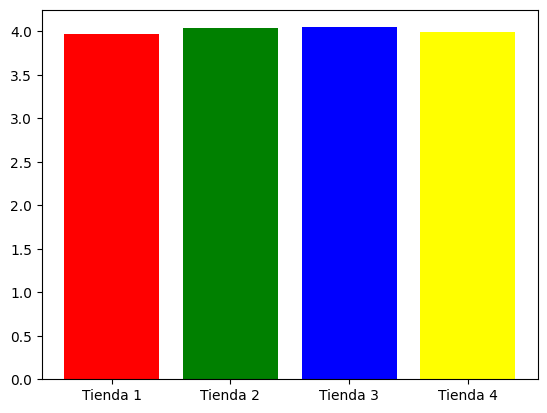

In [ ]:
tiendas = ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"]
promedios = [promedio_producto_tienda1,promedio_producto_tienda2,promedio_producto_tienda3,promedio_producto_tienda4]
colors = ["red","green","blue","yellow"]

plt.bar(tiendas,promedios,color=colors)
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
print("Tienda 1")
producto_counts = tienda["Producto"].value_counts()

# El producto más vendido es el primero en la serie de value_counts()
producto_mas_vendido = producto_counts.index[0]
cantidad_mas_vendido = producto_counts.values[0]

# El producto menos vendido es el último en la serie de value_counts()
producto_menos_vendido = producto_counts.index[-1]
cantidad_menos_vendido = producto_counts.values[-1]


print(f"Producto más vendido: {producto_mas_vendido} (Cantidad: {cantidad_mas_vendido})")
print(f"Producto menos vendido: {producto_menos_vendido} (Cantidad: {cantidad_menos_vendido})")


print("Tienda 2")
producto2_counts = tienda2["Producto"].value_counts()

# El producto más vendido es el primero en la serie de value_counts()
producto_mas_vendido2 = producto2_counts.index[0]
cantidad_mas_vendido2 = producto2_counts.values[0]

# El producto menos vendido es el último en la serie de value_counts()
producto_menos_vendido2 = producto2_counts.index[-1]
cantidad_menos_vendido2 = producto2_counts.values[-1]


print(f"Producto más vendido: {producto_mas_vendido2} (Cantidad: {cantidad_mas_vendido2})")
print(f"Producto menos vendido: {producto_menos_vendido2} (Cantidad: {cantidad_menos_vendido2})")


print("Tienda 3")
producto3_counts = tienda3["Producto"].value_counts()

# El producto más vendido es el primero en la serie de value_counts()
producto_mas_vendido3 = producto3_counts.index[0]
cantidad_mas_vendido3 = producto3_counts.values[0]

# El producto menos vendido es el último en la serie de value_counts()
producto_menos_vendido3 = producto3_counts.index[-1]
cantidad_menos_vendido3 = producto3_counts.values[-1]


print(f"Producto más vendido: {producto_mas_vendido3} (Cantidad: {cantidad_mas_vendido3})")
print(f"Producto menos vendido: {producto_menos_vendido3} (Cantidad: {cantidad_menos_vendido3})")

print("Tienda 4")
producto4_counts = tienda4["Producto"].value_counts()

# El producto más vendido es el primero en la serie de value_counts()
producto_mas_vendido4 = producto4_counts.index[0]
cantidad_mas_vendido4 = producto4_counts.values[0]

# El producto menos vendido es el último en la serie de value_counts()
producto_menos_vendido4 = producto4_counts.index[-1]
cantidad_menos_vendido4 = producto4_counts.values[-1]


print(f"Producto más vendido: {producto_mas_vendido4} (Cantidad: {cantidad_mas_vendido4})")
print(f"Producto menos vendido: {producto_menos_vendido4} (Cantidad: {cantidad_menos_vendido4})")

Tienda 1
Producto más vendido: Microondas (Cantidad: 60)
Producto menos vendido: Celular ABXY (Cantidad: 33)
Tienda 2
Producto más vendido: Iniciando en programación (Cantidad: 65)
Producto menos vendido: Juego de mesa (Cantidad: 32)
Tienda 3
Producto más vendido: Kit de bancas (Cantidad: 57)
Producto menos vendido: Bloques de construcción (Cantidad: 35)
Tienda 4
Producto más vendido: Cama box (Cantidad: 62)
Producto menos vendido: Guitarra eléctrica (Cantidad: 33)


# 5. Envío promedio por tienda

In [ ]:
print("Tienda 1")
promedio_envio_tienda1 = np.average((tienda['Costo de envío']))
print(promedio_envio_tienda1)

print("Tienda 2")
promedio_envio_tienda2 = np.average((tienda2['Costo de envío']))
print(promedio_envio_tienda2)

print("Tienda 3")
promedio_envio_tienda3 = np.average((tienda3['Costo de envío']))
print(promedio_envio_tienda3)

print("Tienda 4")
promedio_envio_tienda4 = np.average((tienda4['Costo de envío']))
print(promedio_envio_tienda4)

Tienda 1
26018.60958033065
Tienda 2
25216.235693090293
Tienda 3
24805.680373039424
Tienda 4
23459.457167090754


El proposito de este analisis es analizar diferentes metricas y/o factores que ayuden a tomar la desicion sobre que tienda debe ser vendida de acuerdo a los ingresos totales, las categorias de los productos más y menos vendidas, el promedio de las calificaciones de cada venta, que producto es el más y el menos vendido y el coste de envio de cada una de ella.

Luego de realizar el analisis de cada una de las tiendas podemos observar que la tienda N°4 es la que menor ingreso genera con 23.6% en comparacion a las demás, posee una calificación promedio inferior a las demás y similar a la tienda N°1 y es la que posee menor cantidad de promedio por envio significando que no se venden los suficientes productos para que esta sea superior.

Por lo cual, como conclusión luego de este analisis podemos concluir que se debe de vender la tienda N°4.